In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

5


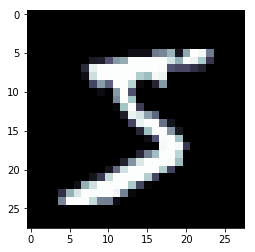

In [7]:
plt.imshow(x_train[0], cmap='bone')
print(y_train[0])

In [8]:
y_train, y_test = y_train[:, np.newaxis], y_test[:, np.newaxis]
print(y_train.shape, y_test.shape)

(60000, 1) (10000, 1)


In [0]:
tfkl = tf.keras.layers

In [47]:
x = tfkl.Input(shape=x_train.shape[1:], batch_size=None)
x_flat = tfkl.Flatten()(x)
h1 = tfkl.Dense(128, activation=tf.nn.relu)(x_flat)
h2 = tfkl.Dense(32, activation=tf.nn.relu)(h1)
yhat = tfkl.Dense(10, activation=tf.nn.softmax)(h2)

model = tf.keras.Model(inputs=x, outputs=yhat)

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_30 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [43]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

results = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 110us/sample - loss: 4.9079 - acc: 0.3599 - val_loss: 1.5985 - val_acc: 0.4757
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 1.3361 - acc: 0.5974 - val_loss: 1.1190 - val_acc: 0.6574
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.9720 - acc: 0.7110 - val_loss: 0.8087 - val_acc: 0.7487
Epoch 4/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.6789 - acc: 0.8075 - val_loss: 0.6268 - val_acc: 0.8324
Epoch 5/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.5041 - acc: 0.8632 - val_loss: 0.5154 - val_acc: 0.8667


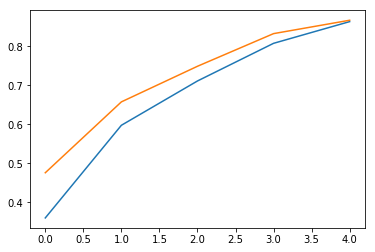

In [44]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])